# Task Description : 
Develop a Deep Neural Network model to predict the **PE** for the given **input data** . Please keep in mind the following:


*   1 bonus point - **(functioning model)** and 1 bonus point - **(top 5 models)**.
*   Submission Deadline is **June 9, 23:59**.
*   Please submit only .ipynb file for consistency.
*   Do not copy code from other students otherwise you will not be graded.
*   Try to write the code cleanly and only write what is asked in the final submission file.





*We expect you to upload  ('one' python file with name ***Exercise_4_Task_yourname***  and 'one' model.h5 with name **your_name_final_model.h5** file which contains your final trained model) on elearning in exactly the same format as explained below.*

**Special Note:** 

You need to model DNN using  **only pytorch library**. In the class we modelled DNN using tensorflow.keras library. Please use this [link](https://github.com/edgarsmdn/MLCE_book/blob/main/04_DNN_VLE.ipynb) to understand how to model DNN using pytorch and also to know which libraries to import.

In [1]:
# import all required libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%pip install skorch -q
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Upload training data here (use the data provided on github under the task description)
df = pd.read_csv('data\CCPP_training_data.csv')

df.head()

,AT,V,AP,RH,PE
0,14.12,41.39,1018.73,76.51,472.88
1,20.10,58.95,1018.46,80.87,446.70
2,30.53,65.18,1012.69,41.85,437.89
3,12.24,44.92,1023.74,88.21,473.26
4,31.16,64.96,1001.71,44.85,425.82


In [3]:
# Perform data cleaning if required and define corresponding variables for [inputs /features]  and [corresponding output (Experimental values)]
# Please note: Input/Features are AT,V,AP,RH and Output is PE

# Define dataset and target
df = np.array(df)

# Define features and lables
X = df[:,0:4].astype(np.float32)
y = df[:,4].reshape(-1,1).astype(np.float32)

# Scale (normalize) data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Do cross validation using GridsearchCV as done in the lecture

# Define neural network model class
class dNN_CCPP(nn.Module):
    def __init__(self,num_units=10,nonlin=F.relu):
        super(dNN_CCPP,self).__init__()
        
        self.module = nn.Sequential(
            nn.Linear(4,num_units),
            nn.LeakyReLU(),
            nn.Linear(num_units,1),
        )
        
    def forward(self,X):
        X = self.module(X)
        return X
    
# Define model
Neural_Net = NeuralNetRegressor(
    dNN_CCPP,
    criterion=nn.MSELoss,
    max_epochs=100,
    optimizer=optim.Adam,
    optimizer__lr = 0.01,
    verbose=0
)

# Define parameter grid
params = {
    'max_epochs': [75,100],
    'optimizer__lr': [0.05, 0.08],
    'module__num_units': [256],
}

# Define grid search
grid = GridSearchCV(
    Neural_Net,
    params,
    cv = 10,
    scoring='neg_mean_squared_error')

# Fit grid search
grid.fit(X_scaled,y)

# Print best parameters
print("Best model parameters:", grid.best_params_)

Best model parameters: {'max_epochs': 100, 'module__num_units': 256, 'optimizer__lr': 0.05}


In [5]:
# Train your final model using all the available data points with optimized hyperparamters (found in best model of GridsearchCv)

# Define best model using the best hyperparameters
best_model = grid.best_estimator_
# Scale the entire feature dataset
X_scaled = scaler.transform(X)
# Fit the best model
darshan_jogani_final_model = best_model.fit(X_scaled,y)

In [6]:
# Write code to save your final trained model and download the saved file with name 'your_name_final_model.h5' to submit along with this python file

torch.save(darshan_jogani_final_model, 'darshan_jogani_final_model.h5')

MSE  :  19.84952
R2   :  0.9315863893333822


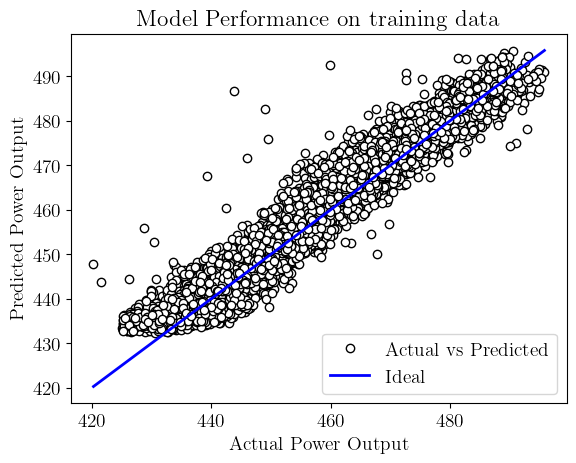

In [7]:
# At last write the final function in exactly the same format as taught in class.

def darshan_model(df):
    """
    This function takes the dataset as input and returns the performance of the model
    
    """
    # Define features and lables
    X = df[:,0:4].astype(np.float32)
    y = df[:,4].reshape(-1,1).astype(np.float32)
    # Scale (normalize) data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Load model
    model = torch.load('darshan_jogani_final_model.h5')
    # Predict using model
    y_pred = model.predict(X_scaled)
    # Calculate MSE and R2 score
    print('MSE  : ', MSE(y, y_pred))
    print('R2   : ', r2_score(y, y_pred))
    # Plot actual vs predicted
    plt.figure()
    plt.plot(y, y_pred, 'o', mec = 'k', mfc = 'white', label='Actual vs Predicted')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'b-', linewidth=2, label='Ideal')
    plt.title('Model Performance on training data')
    plt.xlabel('Actual Power Output')
    plt.ylabel('Predicted Power Output')
    plt.legend()
    plt.show()
    return

# Call the function to test the performance of your model on the training dataset
darshan_model(df)

MSE  :  24.481798
R2   :  0.9168622400707711


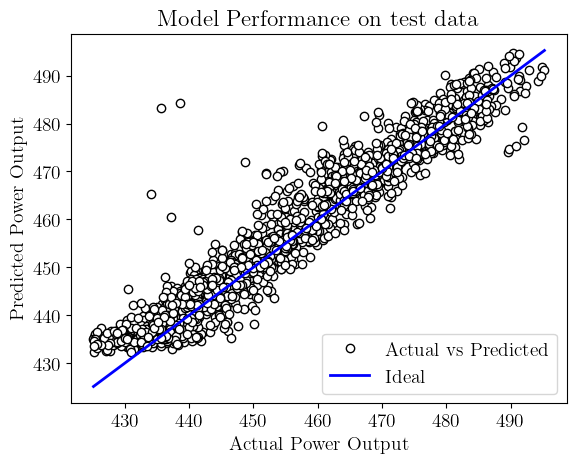

In [8]:
# Test final optimized model on the testing dataset
# Upload testing data here
df_test = pd.read_csv('data\CCPP_testing_data.csv')
df_test = np.array(df_test)

def test_darshan_model(df,df_test):
    """
    This function takes the training and testing datasets as a input and returns the performance of the model on a testing dataset
    
    """
    # Define features and lables of training and testing datasets
    X = df[:,0:4].astype(np.float32)
    X_test = df_test[:,0:4].astype(np.float32)
    y = df[:,4].reshape(-1,1).astype(np.float32)
    y_test = df_test[:,4].reshape(-1,1).astype(np.float32)
    # Scale (normalize) data
    X_scaler = StandardScaler()
    X_scaled = X_scaler.fit_transform(X)
    X_test_scaled = X_scaler.transform(X_test)
    # Load model
    model = torch.load('darshan_jogani_final_model.h5')
    # Predict using model
    y_test_pred = model.predict(X_test_scaled)
    # Calculate MSE and R2 score
    print('MSE  : ', MSE(y_test, y_test_pred))
    print('R2   : ', r2_score(y_test, y_test_pred))
    # Plot actual vs predicted
    plt.figure()
    plt.plot(y_test, y_test_pred, 'o', mec = 'k', mfc = 'white' ,label='Actual vs Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b-', linewidth=2, label='Ideal')
    plt.title('Model Performance on test data')
    plt.xlabel('Actual Power Output')
    plt.ylabel('Predicted Power Output')
    plt.legend()
    plt.show()
    return

# Call the function to test the performance of your model on the test dataset
test_darshan_model(df,df_test)

Note: If you want to use save model only, first you need to define 'dNN_CCPP' class.

**Special Note:**

You need to model DNN using only pytorch library. In the class we modelled DNN using tensorflow.keras library.[link](https://github.com/edgarsmdn/MLCE_book/blob/main/04_DNN_VLE.ipynb) to understand how to model DNN using pytorch and also to know which libraries to import. Using this link you can also learn and are free to add **Early stopping**, change **regularizers** etc. to define your model.